In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import chardet

with open("prueba.csv", "rb") as f:
    result = chardet.detect(f.read())
    encoding = result["encoding"]

df = pd.read_csv("prueba.csv", encoding=encoding, on_bad_lines="skip",sep=";")



In [3]:
df.head()

,Nombre,Plataforma,Año,Genero,Editorial,Ventas NA,Ventas EU,Ventas JP,Ventas Otros,Ventas Global
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()  # Tipos de datos y valores no nulos
df.describe()  # Estadísticas básicas de columnas numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16326 entries, 0 to 16325
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nombre         16326 non-null  object 
 1   Plataforma     16326 non-null  object 
 2   Año            16326 non-null  int64  
 3   Genero         16326 non-null  object 
 4   Editorial      16290 non-null  object 
 5   Ventas NA      16326 non-null  float64
 6   Ventas EU      16326 non-null  float64
 7   Ventas JP      16326 non-null  float64
 8   Ventas Otros   16326 non-null  float64
 9   Ventas Global  16326 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


,Año,Ventas NA,Ventas EU,Ventas JP,Ventas Otros,Ventas Global
count,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000
mean,2006.405611,0.265415,0.147563,0.078667,0.048327,0.540247
std,5.828189,0.821616,0.508780,0.311566,0.189891,1.565779
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
df.isnull().sum()  # Contar valores nulos por columna
df.dropna(inplace=True)  # Eliminar filas con valores faltantes (si es necesario)

In [6]:
df["Año"] = df["Año"].astype(int)  # Convertir "Año" a entero

In [7]:
ventas = ["Ventas NA", "Ventas EU", "Ventas JP", "Ventas Otros", "Ventas Global"]
df[ventas].describe()  # Media, desviación estándar, percentiles, etc.

,Ventas NA,Ventas EU,Ventas JP,Ventas Otros,Ventas Global
count,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000
mean,0.265646,0.147740,0.078839,0.048428,0.540926
std,0.822457,0.509317,0.311888,0.190089,1.567391
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


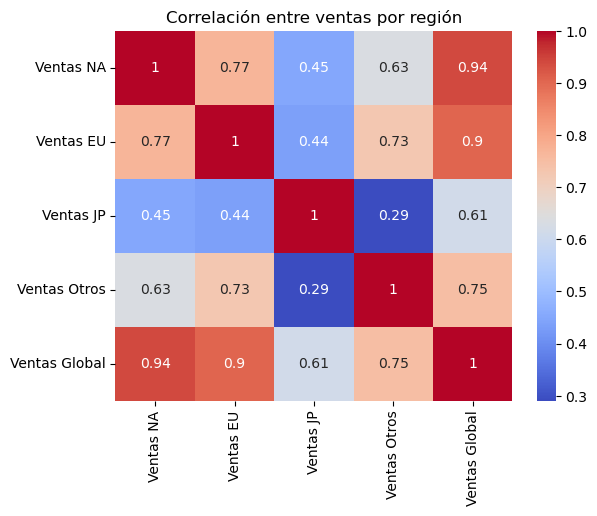

In [8]:
correlacion = df[ventas].corr()
sns.heatmap(correlacion, annot=True, cmap="coolwarm")
plt.title("Correlación entre ventas por región")
plt.show()

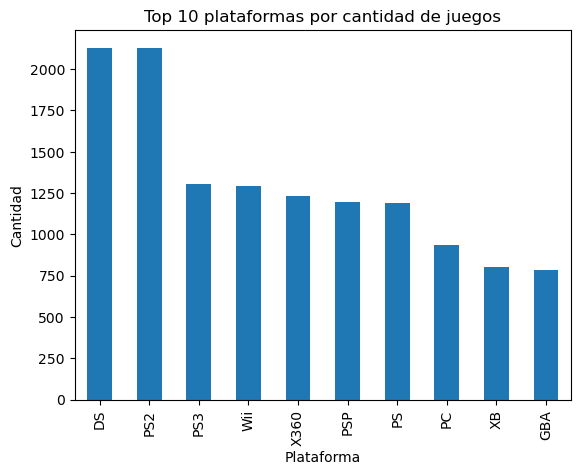

In [9]:
plataformas = df["Plataforma"].value_counts().head(10)
plataformas.plot(kind="bar", title="Top 10 plataformas por cantidad de juegos")
plt.xlabel("Plataforma")
plt.ylabel("Cantidad")
plt.show()

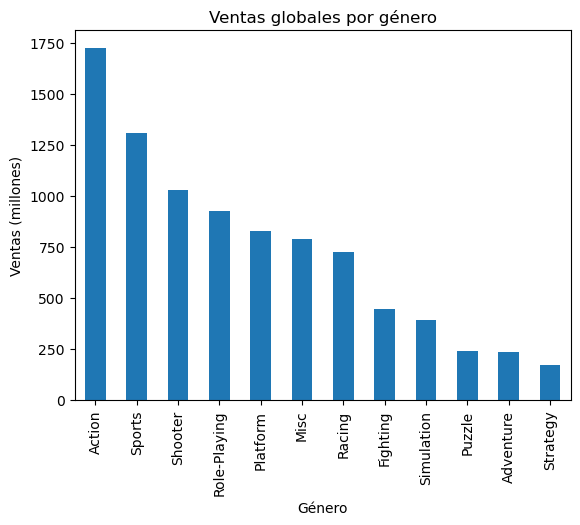

In [10]:
ventas_por_genero = df.groupby("Genero")["Ventas Global"].sum().sort_values(ascending=False)
ventas_por_genero.plot(kind="bar", title="Ventas globales por género")
plt.xlabel("Género")
plt.ylabel("Ventas (millones)")
plt.show()

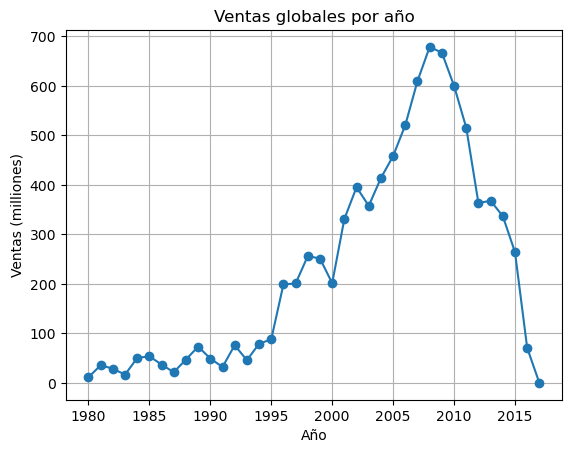

In [11]:
ventas_por_año = df.groupby("Año")["Ventas Global"].sum()
ventas_por_año.plot(kind="line", marker="o", title="Ventas globales por año")
plt.xlabel("Año")
plt.ylabel("Ventas (milliones)")
plt.grid(True)
plt.show()

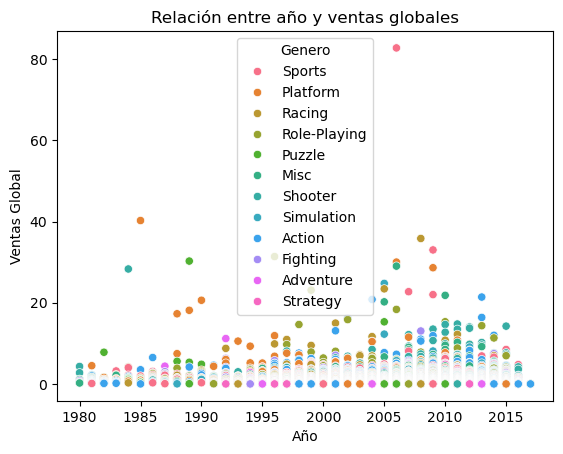

In [12]:
sns.scatterplot(x="Año", y="Ventas Global", data=df, hue="Genero")
plt.title("Relación entre año y ventas globales")
plt.show()

In [13]:
top_juegos = df.sort_values(by="Ventas Global", ascending=False).head(5)[["Nombre", "Ventas Global"]]
print(top_juegos)

                     Nombre  Ventas Global
0                Wii Sports          82.74
1         Super Mario Bros.          40.24
2            Mario Kart Wii          35.82
3         Wii Sports Resort          33.00
4  Pokemon Red/Pokemon Blue          31.37


In [14]:
df.to_csv("analisis_ventas.csv", index=False)  # Exportar datos procesados